In [ ]:
import pandas as pd

customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [ ]:
customers_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [ ]:
products_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [ ]:
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [ ]:
merged_df = pd.merge(transactions_df, customers_df, on='CustomerID')
merged_df[['CustomerName','TransactionID','ProductID','Price']].head()

,CustomerName,TransactionID,ProductID,Price
0,Andrea Jenkins,T00001,P067,300.68
1,Brittany Harvey,T00112,P067,300.68
2,Kathryn Stevens,T00166,P067,300.68
3,Travis Campbell,T00272,P067,300.68
4,Timothy Perez,T00363,P067,300.68


In [ ]:
# Group by UserID and sum the Amount
total_spent = merged_df.groupby(['CustomerID', 'CustomerName'])['Count'].sum().reset_index()
total_spent.rename(columns={'Amount': 'TotalSpent'}, inplace=True)
total_spent


,CustomerID,CustomerName,Price
0,C0001,Lawrence Carroll,1391.67
1,C0002,Elizabeth Lutz,835.68
2,C0003,Michael Rivera,782.83
3,C0004,Kathleen Rodriguez,1925.09
4,C0005,Laura Weber,874.81
...,...,...,...
194,C0196,Laura Watts,1667.97
195,C0197,Christina Harvey,681.17
196,C0198,Rebecca Ray,479.41
197,C0199,Andrea Jenkins,1002.44


In [ ]:
totalproducts_df = pd.merge(products_df,transactions_df, on='ProductID')
totalproducts_df.head()

,ProductID,ProductName,Category,Price_x,TransactionID,CustomerID,TransactionDate,Quantity,TotalValue,Price_y
0,P001,ActiveWear Biography,Books,169.3,T00088,C0019,2024-01-30 17:23:03,2,338.6,169.3
1,P001,ActiveWear Biography,Books,169.3,T00314,C0024,2024-09-24 17:15:16,4,677.2,169.3
2,P001,ActiveWear Biography,Books,169.3,T00428,C0071,2024-08-02 08:13:23,2,338.6,169.3
3,P001,ActiveWear Biography,Books,169.3,T00433,C0036,2024-05-05 05:01:18,2,338.6,169.3
4,P001,ActiveWear Biography,Books,169.3,T00449,C0191,2024-12-12 12:17:38,1,169.3,169.3


In [ ]:
Sales_df = totalproducts_df.groupby(['ProductID', 'ProductName','Category']).agg({
    'Quantity': 'sum',  # Sum up quantities
    'Price_x': 'sum'      # Sum up prices
}).reset_index().sort_values(by='Quantity', ascending=False)

Sales_df.head()

,ProductID,ProductName,Category,Quantity,Price_x
58,P059,SoundWave Jeans,Clothing,46,5760.80
53,P054,SoundWave Cookbook,Books,46,916.80
28,P029,TechPro Headphones,Electronics,45,7371.88
78,P079,ActiveWear Rug,Home Decor,43,6677.92
60,P061,HomeSense Desk Lamp,Home Decor,43,2511.36


In [ ]:
Sales_df.sort_values(by='Price_x', ascending=False).head()

,ProductID,ProductName,Quantity,Price_x
28,P029,TechPro Headphones,45,7371.88
78,P079,ActiveWear Rug,43,6677.92
47,P048,TechPro Cookbook,43,6246.00
61,P062,HomeSense Novel,39,5986.56
82,P083,ActiveWear Smartwatch,30,5924.36


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

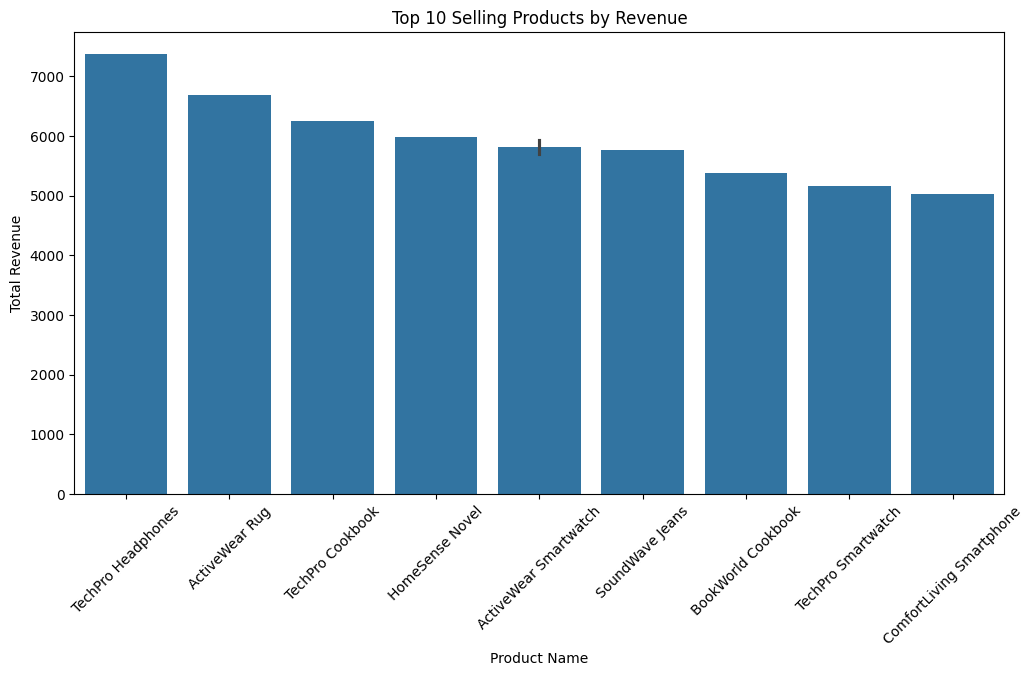

In [ ]:
# Insight 01
# Visualize top selling products by revenue
plt.figure(figsize=(12, 6))
sns.barplot(x='ProductName', y='Price_x', data=Sales_df.sort_values(by='Price_x', ascending=False).head(10)) # Show top 10
plt.title('Top 10 Selling Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

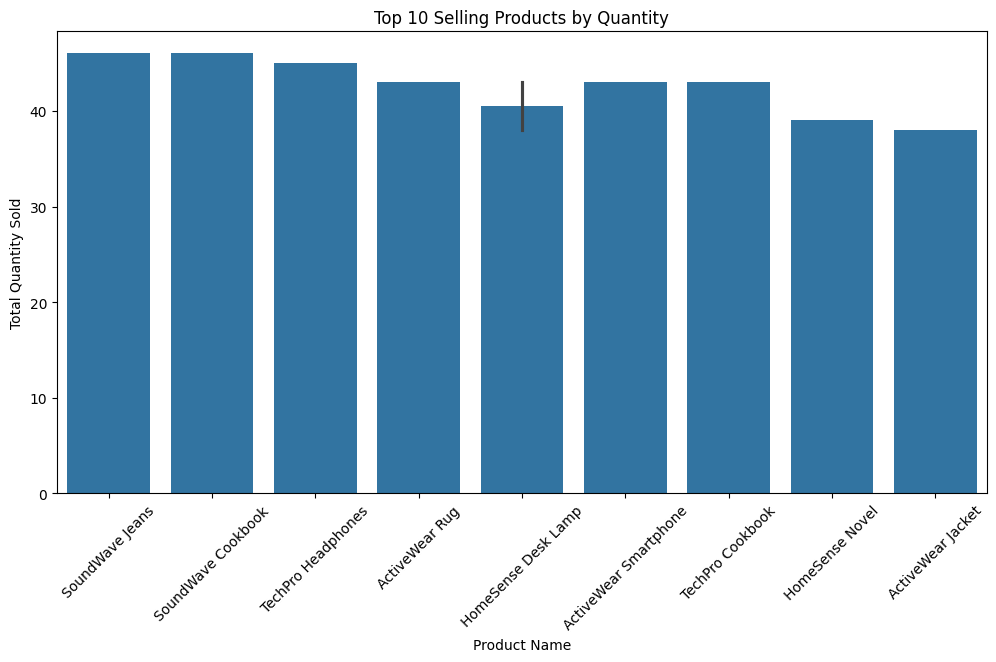

In [ ]:
# Insight 01
# Visualize top selling products by quantity
plt.figure(figsize=(12, 6))
sns.barplot(x='ProductName', y='Quantity', data=Sales_df.head(10)) # Show top 10
plt.title('Top 10 Selling Products by Quantity')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Insight 02
# Combine row counts and other aggregations
aggregated_df = merged_df.groupby(['CustomerID', 'CustomerName']).agg(
    TransactionCount=('Quantity', 'count'),  # Count non-null rows in Quantity
    TotalQuantity=('Quantity', 'sum'),  # Sum of Quantity
    TotalRevenue=('Price', 'sum')  # Sum of Price
).reset_index().sort_values('TotalQuantity',ascending=False)

aggregated_df


,CustomerID,CustomerName,TransactionCount,TotalQuantity,TotalRevenue
108,C0109,Abigail Jones,11,32,2184.14
164,C0165,Juan Mcdaniel,9,30,1847.44
155,C0156,William Adams,11,28,3179.64
74,C0075,Misty Higgins,9,28,1975.43
64,C0065,Gerald Hines,10,27,2758.00
...,...,...,...,...,...
13,C0014,Deborah Wilcox,1,2,159.33
32,C0033,Tyler Holt,1,2,66.32
59,C0060,James Murphy,1,2,41.18
96,C0097,Tina Ford,1,1,137.54


In [ ]:
# Insight 03
aggregated_df.sort_values('TotalRevenue',ascending=False).head()

,CustomerID,CustomerName,TransactionCount,TotalQuantity,TotalRevenue
140,C0141,Paul Parsons,10,27,3857.06
155,C0156,William Adams,11,28,3179.64
58,C0059,Mrs. Kimberly Wright,8,21,2843.71
64,C0065,Gerald Hines,10,27,2758.00
103,C0104,Laura Bennett,8,21,2651.24


In [ ]:
#insight 05
category_wise_df = Sales_df.groupby('Category').agg(Quantity=('Quantity', 'sum')).reset_index()
category_wise_df

,Category,Quantity
0,Books,681
1,Clothing,590
2,Electronics,627
3,Home Decor,639
